#### 데이터 준비
https://www.kaggle.com/c/titanic/data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_titanic = pd.read_csv('data/titanic/train.csv')
df_titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### 데이터 탐색

#### 변수 선택
* 불필요한 컬럼 : ['Name','Ticket','Fare','Cabin']

In [2]:
# 불필요한 컬럼 제거
df_titanic = df_titanic.drop(['Name', 'Ticket', 'Fare', 'Cabin'], axis=1)

#### 결측치 처리
* 결측치가 있는 모든 행 삭제
    * `dropna()`

In [3]:
# 결측치가 포함된 행 제거
df_titanic = df_titanic.dropna()

#### 범주형 데이터 인코딩
* Sex : male->1, femali->0
* Embarked  : C->0, Q->1, S->2

In [4]:
# 범주형 변수 수동 인코딩
df_titanic['Sex'] = df_titanic['Sex'].map({'male': 1, 'female': 0})
df_titanic['Embarked'] = df_titanic['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

## 모델링
1. 훈련세트, 테스트세트 분할
2. 모델 생성
3. 훈련세트로 훈련
4. 테스트세트로 예측
5. 실제값, 예측값 이용하여 평가

#### 훈련세트, 테스트세트 분할

In [5]:
from sklearn.model_selection import train_test_split

# 독립변수와 종속변수 분리
X = df_titanic.drop(['Survived', 'PassengerId'], axis=1)
y = df_titanic['Survived']

# 데이터 분할 (train: 80%, test: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 모델 생성

In [6]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 생성
model = RandomForestClassifier(random_state=42)

In [7]:
# 모델 학습
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# 테스트 세트 예측
y_pred = model.predict(X_test)

### 모델 평가

Accuracy: 0.7762
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        80
           1       0.78      0.68      0.73        63

    accuracy                           0.78       143
   macro avg       0.78      0.77      0.77       143
weighted avg       0.78      0.78      0.77       143



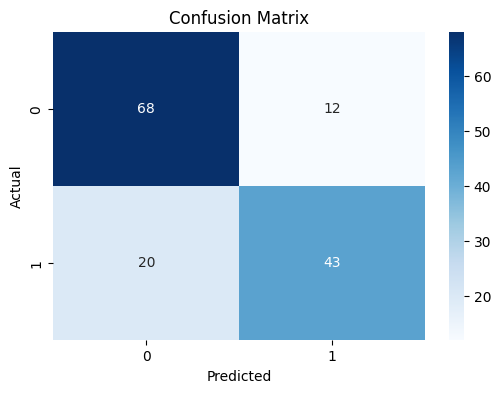

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 정확도
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# 정밀도, 재현율, F1-score
print(classification_report(y_test, y_pred))

# 혼동 행렬
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy:{accuracy}')

accuracy:0.7762237762237763
